### Exploratory Data Analysis for all Job Postings

This notebook explores job role distribution, job locations, and other key patterns in the dataset

In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load cleaned data
df = pd.read_parquet("../data_processed/data_jobs_cleaned.parquet")

### Job Role Distribution

This bar chart shows the 10 most common job titles in the dataset. Data Analyst, Data Scientist, and Data Engineer dominate the landscape, reflecting demand for core data roles across industries.


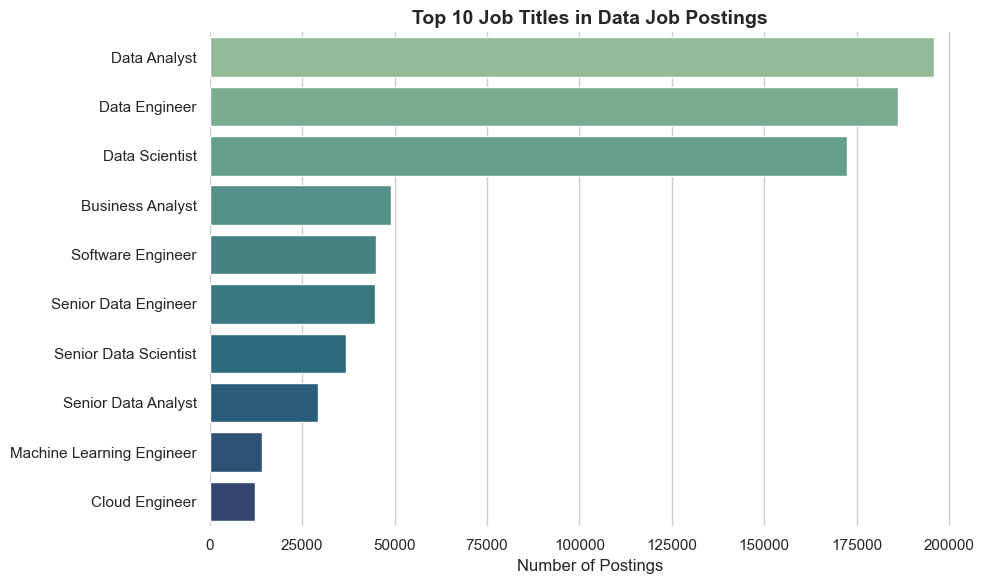

In [2]:
# Prepare the data
top_roles = df['job_title_short'].value_counts().head(10).sort_values(ascending=False)

# Set seaborn style
sns.set_theme(style='whitegrid')

# Set up figure
fig, ax = plt.subplots(figsize=(10, 6))

# Create horizontal bar plot
bars = sns.barplot(x=top_roles.values, y=top_roles.index, palette='crest', ax=ax, hue = top_roles.index, legend = False)


# Customization
ax.set_title('Top 10 Job Titles in Data Job Postings', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Postings')
ax.set_ylabel('')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


### Top 10 Countries by Job Postings

This horizontal bar chart highlights the countries with the highest number of data-related job postings in the dataset. The United States leads by a significant margin, followed by other key markets like the United Kingdom, India, and France. 

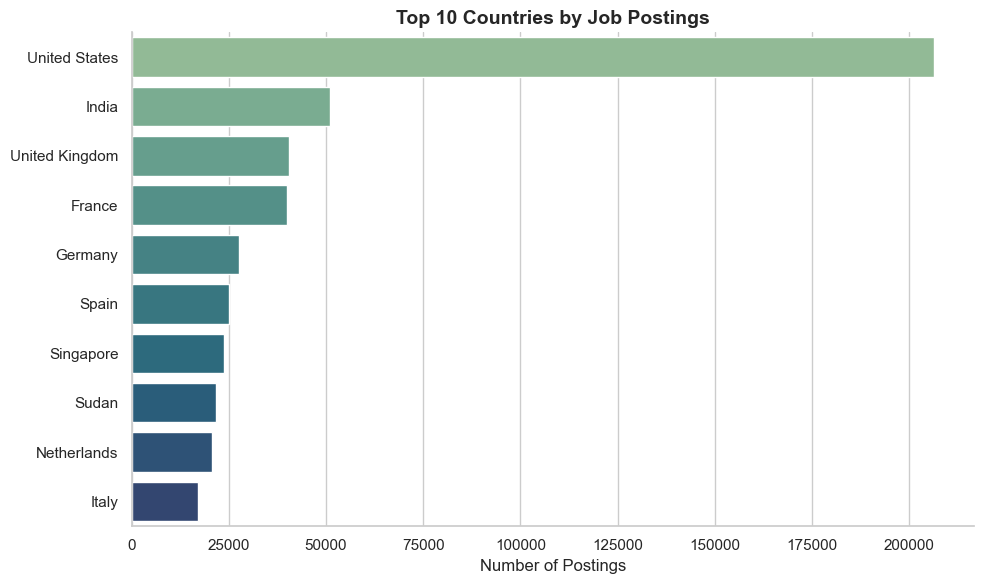

In [3]:
top_countries = df['job_country'].value_counts().head(10).sort_values(ascending = False)

sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))
bars = sns.barplot(x=top_countries.values, y=top_countries.index, palette='crest', ax=ax, hue = top_countries.index, legend = False)
ax.set_title('Top 10 Countries by Job Postings', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Postings')
ax.set_ylabel('')
sns.despine()
plt.tight_layout()
plt.show()


### Focused Analysis: Data Analyst Roles in the United States

To gain deeper and more targeted insights, I narrowed my analysis to job postings for **Data Analyst** roles based in the **United States**. This filtered subset allows us to explore location-specific trends, benefits offered, and hiring patterns within a high-demand role in a key market.

By focusing on a single job category and country, I was able to identify:
- The top U.S. cities hiring Data Analysts
- The prevalence of remote work and other benefits
- Which companies are leading in Data Analyst recruitment


In [4]:
# Filter for Data Analyst roles in U.S

df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()



### Top Job Posting Platforms for Data Analyst Roles in the U.S.

This visualization displays the most common platforms through which Data Analyst jobs in the U.S. were advertised. By analyzing the `job_via` column, I identified the leading sources—such as LinkedIn, Indeed, and company websites—that recruiters and employers rely on. Understanding these platforms can help job seekers prioritize where to focus their search efforts for maximum visibility.


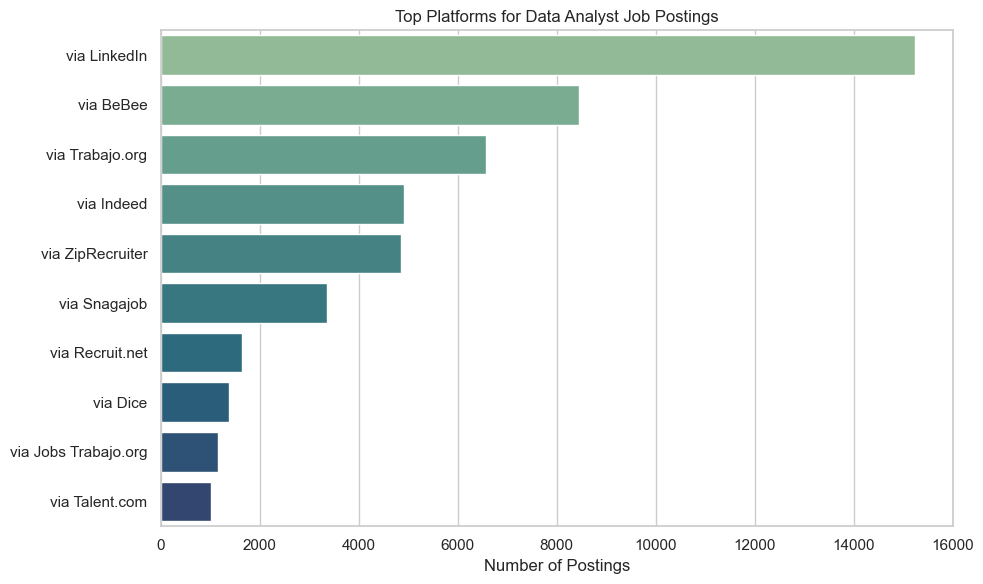

In [5]:
# Top 10 sources
platform_counts = df_DA_US['job_via'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=platform_counts.index, x=platform_counts.values, palette='crest', hue = platform_counts.index, legend = False)
plt.title("Top Platforms for Data Analyst Job Postings")
plt.xlabel("Number of Postings")
plt.ylabel("")
plt.tight_layout()
plt.show()


### Top U.S. Job Locations

This lollipop chart shows the top 10 job locations for Data Analyst roles in the United States. "Anywhere" appears as the leading location, which likely represents fully remote positions where no specific city is listed. 

Other top locations include major tech hubs such as New York, Chicago, Austin, and Atlanta — reflecting the continued demand for data talent in both traditional and emerging innovation centers.


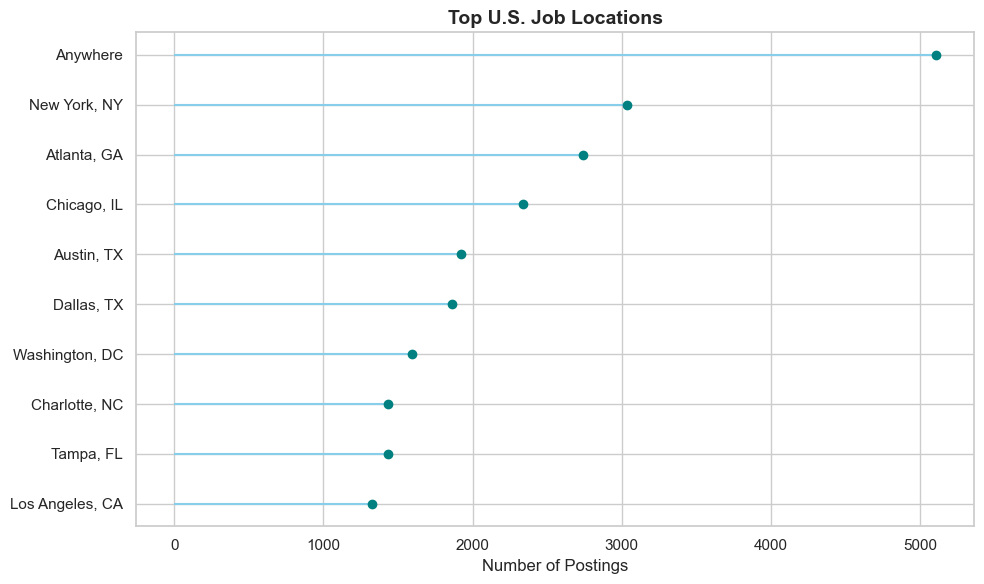

In [6]:
top_locations = df_DA_US['job_location'].value_counts().head(10).sort_values()

fig, ax = plt.subplots(figsize=(10, 6))
ax.hlines(y=top_locations.index, xmin=0, xmax=top_locations.values, color='skyblue')
ax.plot(top_locations.values, top_locations.index, 'o', color='teal')
ax.set_title('Top U.S. Job Locations', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Postings')
plt.tight_layout()
plt.show()


### Job Benefits and Requirements

This section explores three key binary features in the U.S. Data Analyst job postings:
- Whether a job allows remote work
- Whether a degree is required
- Whether health insurance is offered

By visualizing these as proportions, we gain insight into how flexible and benefit-oriented these roles are. 


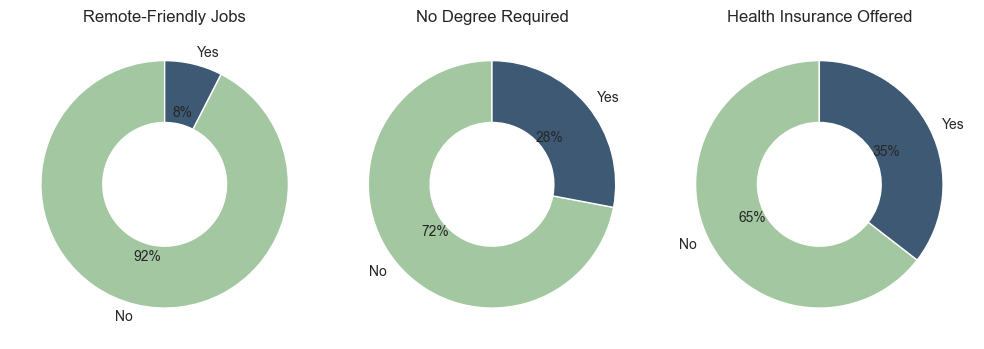

In [7]:
bool_cols = ['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']
titles = ['Remote-Friendly Jobs', 'No Degree Required', 'Health Insurance Offered']
colors = ['#a3c7a1', '#3e5973']

fig, axes = plt.subplots(1, 3, figsize=(10, 6))  

for i, col in enumerate(bool_cols):
    data = df_DA_US[col].value_counts()
    labels = ['Yes', 'No'] if data.index[0] == 1 else ['No', 'Yes']  # Force consistent label order

    wedges, texts, autotexts = axes[i].pie(
        data,
        labels=labels,
        autopct='%1.0f%%',
        startangle=90,
        wedgeprops=dict(width=0.5),  # Donut effect
        colors= colors,
        textprops={'fontsize': 10}   # Adjust label size to avoid spill
    )

    axes[i].set_title(titles[i], fontsize=12)
    axes[i].set_ylabel('')  

plt.tight_layout()
plt.show()


### Top Companies Hiring for Data Analyst Roles in the U.S.

To better understand the hiring landscape, I explored which companies are posting the most job openings for Data Analyst roles within the United States. This gives insight into the major players in the market, where opportunities may be concentrated, and potential employers to target in job searches or deeper business analysis.


In [8]:
import plotly.express as px

# Convert Series to DataFrame and rename columns
top_companies_df = df_DA_US['company_name'].value_counts().head(10).reset_index()
top_companies_df.columns = ['company_name', 'count']

# Plot treemap
fig = px.treemap(
    top_companies_df,
    path=['company_name'],
    values='count',
    title='Top 10 Hiring Companies (Treemap View)',
    color='count',
    color_continuous_scale='tealrose'
)

fig.update_traces(textinfo='label+value+percent entry')
fig.show()
